In [ ]:
!pip install google-play-scraper

# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

import nltk
try:
    nltk.data.find('tokenizers/punkt_tab/english')
except LookupError:
    nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Mengambil semua ulasan dari aplikasi dengan ID 'com.byu.id' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.byu.id',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=1000             # Jumlah maksimum ulasan yang ingin diambil
)

In [ ]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

In [ ]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ded4f41c-ad29-4bf2-9966-67ffc8def866,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"dari segi apk, apknya sendiri sering ngebug. f...",3,3,1.61.0,2025-07-05 21:31:52,"Hai Kak, maaf ya udah bikin ga nyaman :( Terka...",2025-07-05 21:34:33,1.61.0
1,e419aa4b-dca4-4a37-89d4-f8edd96f3d7e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Makin kesini makin jelek jaringannya heran ban...,2,20,1.61.0,2025-06-29 14:39:27,"Hai Kak Alya, maaf udah bikin ga nyaman ya :( ...",2025-06-29 14:44:18,1.61.0
2,cad5ea68-ad51-4738-be18-ed727819dcdc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"kualitas sinyal sangat buruk, kuota sering goi...",1,6,1.61.0,2025-07-05 15:05:23,Hi Kak. Maaf udah bikin ga nyaman. Untuk kenda...,2025-07-05 15:07:02,1.61.0
3,87401f94-b82a-447d-9d41-7feaba7e07ca,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya ingin menyampaikan kekecewaan saya terhad...,1,97,1.61.0,2025-05-19 08:42:04,Hai kak. Nindy dan Team mohon maaf atas masala...,2025-05-19 14:21:03,1.61.0
4,c4eb9fd6-63b1-4768-9627-6556330ca263,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,revisi ulasan sebelumnya tentang keluhan tidak...,5,499,1.61.0,2025-06-10 20:14:28,Hallo Kak. Maaf banget udah bikin gak nyaman. ...,2025-06-10 20:17:15,1.61.0


In [ ]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99000 entries, 0 to 98999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              99000 non-null  object        
 1   userName              99000 non-null  object        
 2   userImage             99000 non-null  object        
 3   content               99000 non-null  object        
 4   score                 99000 non-null  int64         
 5   thumbsUpCount         99000 non-null  int64         
 6   reviewCreatedVersion  80754 non-null  object        
 7   at                    99000 non-null  datetime64[ns]
 8   replyContent          92857 non-null  object        
 9   repliedAt             92857 non-null  datetime64[ns]
 10  appVersion            80754 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.3+ MB


In [ ]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [ ]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,820f2f40-0cde-41c9-acbc-8088486deefc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Haduhh makin parah ini operator, buka aplikasi...",1,52,1.60.0,2025-02-09 21:22:35,"Hai Kak, maaf ya udah bikin ga nyaman :( Terka...",2025-02-09 22:55:15,1.60.0,Haduhh makin parah ini operator buka aplikasi ...,haduhh makin parah ini operator buka aplikasi ...,haduhh makin parah ini operator buka aplikasi ...,"[haduhh, makin, parah, ini, operator, buka, ap...","[haduhh, parah, operator, buka, aplikasi, bang...",haduhh parah operator buka aplikasi banget ber...
1,1b1ca5ac-66bd-4613-9bb4-37cb1c3318f2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sering hilang sinyal,lemot dan parah sinyalnya...",1,28,1.60.0,2025-02-06 04:03:59,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-02-06 06:23:12,1.60.0,Sering hilang sinyallemot dan parah sinyalnya ...,sering hilang sinyallemot dan parah sinyalnya ...,sering hilang sinyallemot dan parah sinyalnya ...,"[sering, hilang, sinyallemot, dan, parah, siny...","[hilang, sinyallemot, parah, sinyalnya, errorn...",hilang sinyallemot parah sinyalnya errornyanye...
2,ff7da062-d90e-447c-afad-97a488dcf1ea,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi berat banget, suka bengong. Kode prog...",1,61,1.60.0,2025-01-31 22:23:53,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2025-02-01 18:36:51,1.60.0,Aplikasi berat banget suka bengong Kode progra...,aplikasi berat banget suka bengong kode progra...,aplikasi berat banget suka bengong kode progra...,"[aplikasi, berat, banget, suka, bengong, kode,...","[aplikasi, berat, banget, suka, bengong, kode,...",aplikasi berat banget suka bengong kode progra...
3,926cdd1c-7f04-42fd-bb0c-b9a85ac8d368,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya masih banyak bug, ketika saya tap ...",2,0,1.60.0,2025-02-15 12:55:45,"Dear, Kak Faront. Maaf banget huhu udah buat g...",2025-02-16 08:15:58,1.60.0,Aplikasinya masih banyak bug ketika saya tap U...,aplikasinya masih banyak bug ketika saya tap u...,aplikasinya masih banyak bug ketika saya tap u...,"[aplikasinya, masih, banyak, bug, ketika, saya...","[aplikasinya, bug, tap, utainment, stuck, apln...",aplikasinya bug tap utainment stuck aplnya tru...
4,02cfdf8a-a35e-449c-a92e-c5c9668dd08c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagi kalian yang baca ini terus jaringan byu l...,1,30,1.60.0,2025-02-02 20:34:20,"Hai Kak, maaf nih terkait kendalanya, bisa cob...",2025-02-02 23:00:18,1.60.0,Bagi kalian yang baca ini terus jaringan byu l...,bagi kalian yang baca ini terus jaringan byu l...,bagi kalian yang baca ini terus jaringan byu l...,"[bagi, kalian, yang, baca, ini, terus, jaringa...","[baca, jaringan, byu, leg, lainlain, paksa, re...",baca jaringan byu leg lainlain paksa registras...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58495,e01865c7-e75a-4196-b24d-d2541372201a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat lemot sekarg byu parah banget,1,0,1.50.0,2023-11-04 07:37:19,"Halo Kak, maaf banget udah bikin internetan ka...",2023-11-04 07:40:39,1.50.0,Sangat lemot sekarg byu parah banget,sangat lemot sekarg byu parah banget,sangat lemot sekarg byu parah banget,"[sangat, lemot, sekarg, byu, parah, banget]","[lemot, sekarg, byu, parah, banget]",lemot sekarg byu parah banget
58496,f75bf0c2-bda3-4a00-8a5d-2d1417d9a97c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Susah banget buka aplikasinya, gimana mau beli...",1,0,1.51.0,2024-01-04 17:43:28,"Hi, Kak Nur. Maaf banget udah bikin gak nyaman...",2024-01-04 17:47:14,1.51.0,Susah banget buka aplikasinya gimana mau beli ...,susah banget buka aplikasinya gimana mau beli ...,susah bange

In [ ]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    42696
positive    32732
Name: count, dtype: int64


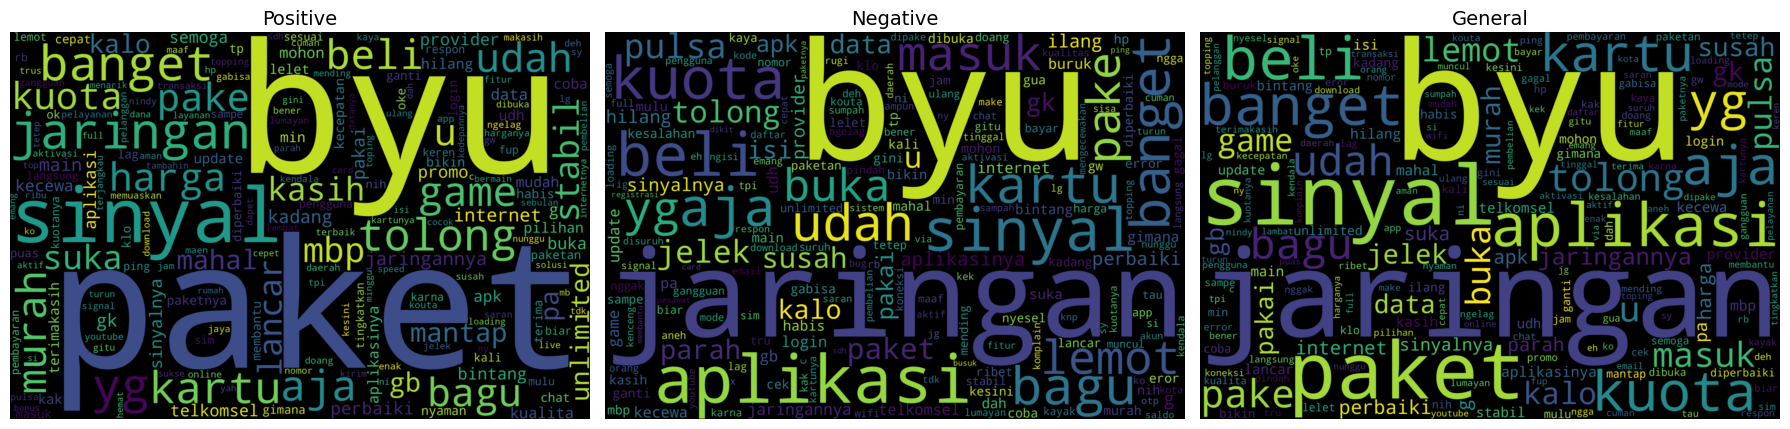

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud, title, ax):
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=14)
    ax.axis('off')

# Pastikan clean_df memiliki kolom 'sentiment' untuk filter kategori
positive_words = ' '.join(clean_df[clean_df['polarity'] == 'positive']['text_akhir'])
negative_words = ' '.join(clean_df[clean_df['polarity'] == 'negative']['text_akhir'])
general_words = ' '.join(clean_df['text_akhir'])  # Semua kategori (general)

# Konfigurasi WordCloud
wordcloud_config = {
    "width": 3000,
    "height": 2000,
    "random_state": 3,
    "collocations": False,
    "stopwords": STOPWORDS
}

# Generate word clouds
wordcloud_positive = WordCloud(**wordcloud_config).generate(positive_words)
wordcloud_negative = WordCloud(**wordcloud_config).generate(negative_words)
wordcloud_general = WordCloud(**wordcloud_config).generate(general_words)

# Plot semua word cloud dalam satu figur
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_cloud(wordcloud_positive, "Positive", axes[0])
plot_cloud(wordcloud_negative, "Negative", axes[1])
plot_cloud(wordcloud_general, "General", axes[2])

plt.tight_layout()
plt.show()


In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
from sklearn.model_selection import train_test_split # Import train_test_split
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 ) # Initialize tfidf as an instance of TfidfVectorizer
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score for Naive Bayes
f1_train_nb = f1_score(y_train, y_pred_train_nb, average='weighted')
f1_test_nb = f1_score(y_test, y_pred_test_nb, average='weighted')

print('Naive Bayes - f1_train:', f1_train_nb)
print('Naive Bayes - f1_test:', f1_test_nb)

Naive Bayes - f1_train: 0.7959730136441708
Naive Bayes - f1_test: 0.7903062441175326


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score for Random Forest
f1_train_rf = f1_score(y_train, y_pred_train_rf, average='weighted')
f1_test_rf = f1_score(y_test, y_pred_test_rf, average='weighted')

print('Random Forest - f1_train:', f1_train_rf)
print('Random Forest - f1_test:', f1_test_rf)

Random Forest - f1_train: 0.9739223892517966
Random Forest - f1_test: 0.8444752975258223


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score for Logistic Regression
f1_train_lr = f1_score(y_train, y_pred_train_lr, average='weighted')
f1_test_lr = f1_score(y_test, y_pred_test_lr, average='weighted')

print('Logistic Regression - f1_train:', f1_train_lr)
print('Logistic Regression - f1_test:', f1_test_lr)

Logistic Regression - f1_train: 0.8715387403383116
Logistic Regression - f1_test: 0.8686350166781459


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score for Decision Tree
f1_train_dt = f1_score(y_train, y_pred_train_dt, average='weighted')
f1_test_dt = f1_score(y_test, y_pred_test_dt, average='weighted')

print('Decision Tree - f1_train:', f1_train_dt)
print('Decision Tree - f1_test:', f1_test_dt)

Decision Tree - f1_train: 0.9739249353273621
Decision Tree - f1_test: 0.7921484523767005
